# Programming Project 2 Justin Broce


In [1]:
include("project2.jl")

pcg (generic function with 4 methods)

I was not entirely sure of what to do with this project, so I've implemented cg method, pcg method, and the jacobi method.
Alongside three preconditions: jacobi,and Gauss Seidel, and Successive over-relaxation.

I implented SOR, but I don't know what paremeter to choose to I just use a random float on the interval [0,2]

The first test is the three different methods, tested against a tridiagonal matrix with a,
really dominant diagonal.

In [9]:
#creating a random matrix a, symetric, and positive definite
m = 1000
A = randn(m,m) + I(m)
A = A * A'
A = Matrix(Tridiagonal(A))
b = randn(m)

println("Conj gradient method:")
x= cg(A,b,1e-6,1e4)
println("norm residual: ", norm(A*x-b))

println("\nP Conj gradient method with jacobi preconditioner:")
x= pcg(A,b,Diagonal(A),1e-6,1e4)
println("norm residual: ", norm(A*x-b))
println("\nwith Gauss siedel conditioner")
x= pcg(A,b,GSp(A),1e-6,1e4)
println("norm residual: ", norm(A*x-b))

println("\njacobi method should converge: ")
x= jacobi(A,b,1e-6,1e4)
println("norm residual: ", norm(A*x-b))


Conj gradient method:
7 iterations
norm residual: 6.723822742608227e-7

P Conj gradient method with jacobi preconditioner:
6 iterations
norm residual: 9.171055990066988e-7

with Gauss siedel conditioner
5 iterations
norm residual: 4.833314315691435e-7

jacobi method should converge: 
7 iterations
norm residual: 8.165346928898003e-7


We can see that the jacobi likes the tridiagonal aspect of the matrix

In [3]:
m = 1000
A = randn(m,m) + I(m).+randn()
A = A * A'
b = randn(m)

println("Conj gradient method:")
x= cg(A,b,1e-6,1e4)
println("norm residual: ", norm(A*x-b))

println("\nP Conj gradient method with jacobi preconditioner:")
x= pcg(A,b,Diagonal(A),1e-6,1e4)
println("norm residual: ", norm(A*x-b))

println("\nwith Gauss siedel conditioner")
x= pcg(A,b,GSp(A),1e-6,1e4)
println("norm residual: ", norm(A*x-b))

println("\njacobi method does not converge: ")
x= jacobi(A,b,1e-6,1e4)
println("norm residual: ", norm(A*x-b))

Conj gradient method:
2198 iterations
norm residual: 9.363372289041217e-7

P Conj gradient method with jacobi preconditioner:
2197 iterations
norm residual: 9.823311674188857e-7

with Gauss siedel conditioner
1075 iterations
norm residual: 9.66413842619385e-7

jacobi method does not converge: 
153 iterations
norm residual: NaN


This is a test comparing a matrix's original condition number to the new one. New is the precoditioner(A) * A. Honestly, I wasn't sure how to do this, or know if the comparison is apt.

In [4]:

function testConditioner(preconditioner)
    before_conditioning = []
    after_conditioning = []
    for m in 10:20:500
        A = A = randn(m,m) + I(m).+randn()
        A = A * A'
        push!(before_conditioning, cond(A))
        push!(after_conditioning, cond(A*preconditioner(A)))
    end
    return before_conditioning./after_conditioning
        
end


testConditioner (generic function with 1 method)

jacobi_test average: 0.9545249802011538


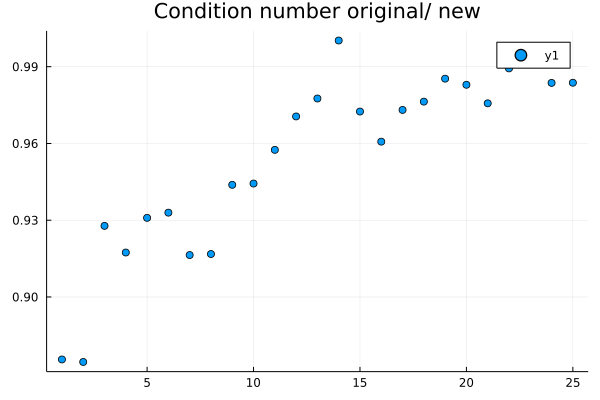

In [5]:
using Plots
j(A) = Diagonal(A)
jacobi_test = testConditioner(j)
println("jacobi_test average: ",mean(jacobi_test))
plot(jacobi_test,seriestype = :scatter, title = "Condition number original/ new")

gauss_seidel_test average: 0.032617599479991786


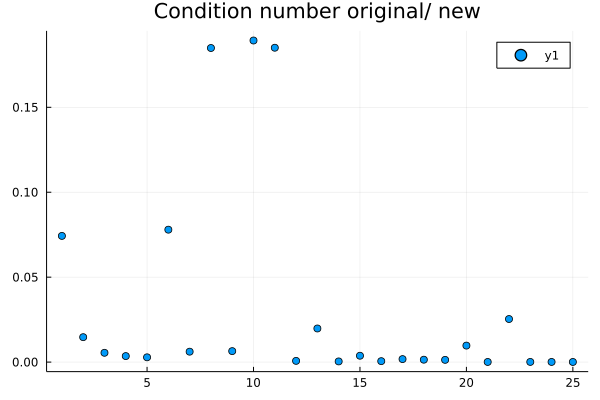

In [6]:

gauss_seidel_test = testConditioner(GSp)
println("gauss_seidel_test average: ",mean(gauss_seidel_test))
plot(gauss_seidel_test,seriestype = :scatter, title = "Condition number original/ new")



SOL_test average:  0.04576099725175324


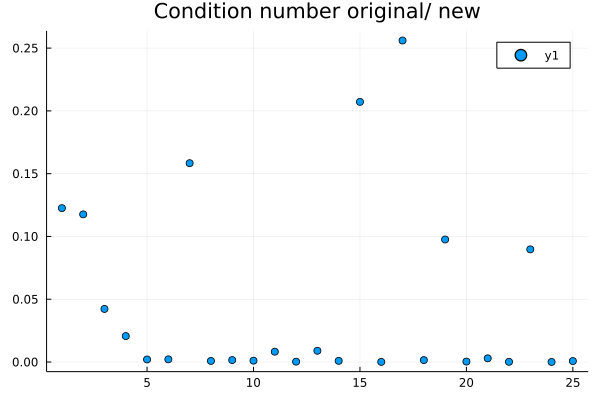

In [7]:
SOL(A) = SSOL(A,2rand())
SOL_test= testConditioner(SOL)
println("SOL_test average:  ",mean(SOL_test))

plot(SOL_test,seriestype = :scatter, title = "Condition number original/ new")



For the last part of my anaylsis I'm going to look at the three different pre conditioners,
Testing them on matrices of size 10, 60 ... 500.

In [8]:


for i in 10:50:500
    A = randn(m,m) + I(m).+randn()
    A = A * A'
    b = randn(m)
    
    println("\nCG: ")
    x = cg(A,b,1e-6,1e4)
    
    println("Jacobi PCG: ")
    x = pcg(A,b,Diagonal(A),1e-6,1e4)
    
    println("Gauss siedel PCG: ")
    x = pcg(A,b,GSp(A),1e-6,1e4)
    
    println("SOL PCG: ")
    x = pcg(A,b,SOL(A),1e-6,1e4)
end
    
    
    
    
    



CG: 
2456 iterations
Jacobi PCG: 
2436 iterations
Gauss siedel PCG: 
3082 iterations
SOL PCG: 
2160 iterations

CG: 
1991 iterations
Jacobi PCG: 
1989 iterations
Gauss siedel PCG: 
934 iterations
SOL PCG: 
845 iterations

CG: 
2259 iterations
Jacobi PCG: 
2260 iterations
Gauss siedel PCG: 
1450 iterations
SOL PCG: 
1454 iterations

CG: 
2294 iterations
Jacobi PCG: 
2279 iterations
Gauss siedel PCG: 
1738 iterations
SOL PCG: 
1812 iterations

CG: 
2314 iterations
Jacobi PCG: 
2298 iterations
Gauss siedel PCG: 
1737 iterations
SOL PCG: 
1614 iterations

CG: 
2423 iterations
Jacobi PCG: 
2408 iterations
Gauss siedel PCG: 
3679 iterations
SOL PCG: 
3693 iterations

CG: 
2482 iterations
Jacobi PCG: 
2462 iterations
Gauss siedel PCG: 
3936 iterations
SOL PCG: 
3131 iterations

CG: 
2541 iterations
Jacobi PCG: 
2538 iterations
Gauss siedel PCG: 
5350 iterations
SOL PCG: 
4746 iterations

CG: 
2288 iterations
Jacobi PCG: 
2305 iterations
Gauss siedel PCG: 
1745 iterations
SOL PCG: 
1848 itera

That's it! 
If you need to run this and haven't used julia before feel free to message me.